## MULTIPLE LINEAR REGRESSION MODEL

##### Problem Statement: The dataset contains information about flights, including details like Airline, Source and Destination cities, Total stops, Price, Departure and Arrival times, and Duration. The objective is to predict the price of the flight which depends on various features. 


Here's an explanation of the various features of the dataset:
1. Airline: The name of the airline operating the flight.
2. Source: The departure city or airport.
3. Destination: The arrival city or airport.
4. Total_Stops: The total number of stops the flight makes between the source and destination.
5. Price: The price of the flight ticket.
6. Date: The day of the month when the flight departs.
7. Month: The month when the flight departs.
8. Year: The year when the flight departs.
9. Dep_hours: The hour part of the departure time.
10. Dep_min: The minute part of the departure time.
11. Arrival_hours: The hour part of the arrival time.
12. Arrival_min: The minute part of the arrival time.
13. Duration_hours: The hour part of the total flight duration.
14. Duration_min: The minute part of the total flight duration.

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns            # Data visualization library
import matplotlib.pyplot as plt  # Data visualization library
%matplotlib inline


In [2]:
# Loading the dataset
df=pd.read_csv("flight_dataset.csv")

In [3]:
# Checking the first few rows of dataset
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [4]:
# Checking the last few rows of the dataset
df.tail()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,2,11753,9,5,2019,10,55,19,15,8,20


#### Data Inspection

In [5]:
#Checking the rows and columns of the dataset
df.shape

(10683, 14)

In [6]:
#Checking the data type in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [7]:
# Checking the statistical information in the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
Date,10683.0,13.508378,8.479277,1.0,6.0,12.0,21.0,27.0
Month,10683.0,4.708602,1.164357,3.0,3.0,5.0,6.0,6.0
Year,10683.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
Dep_hours,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
Arrival_hours,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
Arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0
Duration_hours,10683.0,10.246560,8.494988,1.0,2.0,8.0,15.0,47.0


In [8]:
# Checking the columns of the dataset
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

In [9]:
# Checking the null values in the dataset.
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

<Axes: >

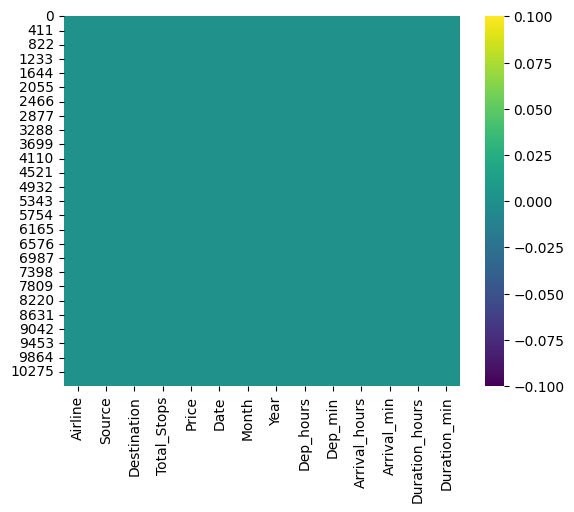

In [10]:
#Visualizing the null values through heatmap
sns.heatmap(df.isnull(),cmap='viridis')

In [11]:
#List of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
# O means object ie., string value
print("Number of numerical variables", len(numerical_features))

Number of numerical variables 11


In [12]:
df[numerical_features].head()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,0,3897,24,3,2019,22,20,1,10,2,50
1,2,7662,1,5,2019,5,50,13,15,7,25
2,2,13882,9,6,2019,9,25,4,25,19,0
3,1,6218,12,5,2019,18,5,23,30,5,25
4,1,13302,1,3,2019,16,50,21,35,4,45


In [13]:
#List of categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
# O means object ie., string value
print("Number of categorical variables", len(categorical_features))

Number of categorical variables 3


In [14]:
df[categorical_features].head()
# Printing the unique values of each categorical feature

,Airline,Source,Destination
0,IndiGo,Banglore,New Delhi
1,Air India,Kolkata,Banglore
2,Jet Airways,Delhi,Cochin
3,IndiGo,Kolkata,Banglore
4,IndiGo,Banglore,New Delhi


In [15]:
# Printing the unique values of each categorical features
for feature in categorical_features:
    print(feature, df[feature].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [16]:
# Printing the unique values of each numerical features 
for feature in numerical_features:
    print(feature, df[feature].unique().tolist())

Total_Stops [0, 2, 1, 3, 4]
Price [3897, 7662, 13882, 6218, 13302, 3873, 11087, 22270, 8625, 8907, 4174, 4667, 9663, 4804, 14011, 5830, 10262, 13381, 12898, 19495, 6955, 3943, 4823, 7757, 13292, 8238, 7682, 4668, 3687, 13227, 4423, 10919, 12373, 5894, 4649, 6245, 19225, 14924, 9646, 8714, 3383, 13062, 3527, 6117, 11150, 7202, 12121, 4377, 4483, 14231, 17345, 7414, 8073, 12395, 8366, 5117, 12524, 7191, 5403, 3625, 10861, 6297, 5678, 9134, 10791, 12819, 6893, 7240, 3898, 4049, 3332, 10844, 7229, 13941, 10197, 13712, 5636, 13014, 7064, 10703, 17057, 13817, 13748, 4880, 3540, 3257, 6478, 8040, 14300, 14781, 14939, 6528, 6121, 13029, 11421, 7574, 11596, 15129, 13555, 5780, 9397, 17024, 5281, 10348, 12677, 15147, 15554, 3971, 3100, 27430, 10676, 13044, 14388, 3597, 5932, 6216, 14067, 13376, 10441, 4030, 13017, 6686, 6442, 9486, 15318, 6147, 7005, 9270, 8586, 10697, 8855, 9314, 4777, 5264, 6092, 3311, 6540, 3419, 5177, 8246, 14676, 13587, 5073, 9345, 14277, 13727, 3858, 4812, 5775, 10539, 873

In [17]:
df1=df.copy()
df1['Arrival_time'] = df1['Arrival_hours'].astype(str).str.zfill(2) + ':' + df1['Arrival_min'].astype(str).str.zfill(2)    # Formed new column Arrival_time and stored arrival hours and arrival mins
df1['Departure_time'] = df1['Dep_hours'].astype(str).str.zfill(2) + ':' + df1['Dep_min'].astype(str).str.zfill(2)          # Formed new column Departure_time and stored departure hours and departure mins
df1['Duration_time'] = df1['Duration_hours'].astype(str).str.zfill(2) + ':' + df1['Duration_min'].astype(str).str.zfill(2) # Formed new column Duration time and stored duration hours and duration mins
df1['Datee'] = df1['Date'].astype(str).str.zfill(2) + '.' + df1['Month'].astype(str).str.zfill(2)+'.'+df1['Year'].astype(str).str.zfill(2)  # Formed new column Datee and stored date, month and year 


In [18]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Arrival_time,Departure_time,Duration_time,Datee
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,01:10,22:20,02:50,24.03.2019
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,13:15,05:50,07:25,01.05.2019
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,04:25,09:25,19:00,09.06.2019
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,23:30,18:05,05:25,12.05.2019
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,21:35,16:50,04:45,01.03.2019


In [19]:
num_features=['Total_Stops','Dep_hours','Dep_min','Arrival_hours','Arrival_min','Duration_hours','Duration_min','Price']
num_df = df1[num_features]
num_df
# Storing numerical features in num_features

,Total_Stops,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Price
0,0,22,20,1,10,2,50,3897
1,2,5,50,13,15,7,25,7662
2,2,9,25,4,25,19,0,13882
3,1,18,5,23,30,5,25,6218
4,1,16,50,21,35,4,45,13302
...,...,...,...,...,...,...,...,...
10678,0,19,55,22,25,2,30,4107
10679,0,20,45,23,20,2,35,4145
10680,0,8,20,11,20,3,0,7229
10681,0,11,30,14,10,2,40,12648


In [20]:
def histogram_boxplot(num_df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=num_df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
       # showmeans=True: This adds a marker (usually a star) on the boxplot to indicate the mean value.
    sns.histplot(
        data=num_df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=num_df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        num_df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        num_df[feature].median(), color="black", linestyle="-"  
    )  # Add median to the histogram

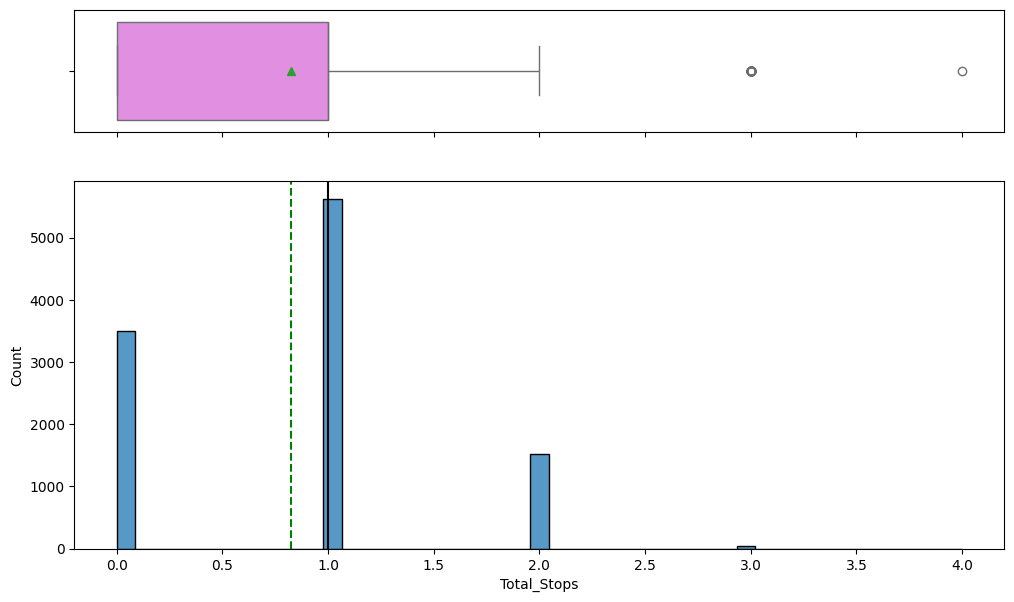

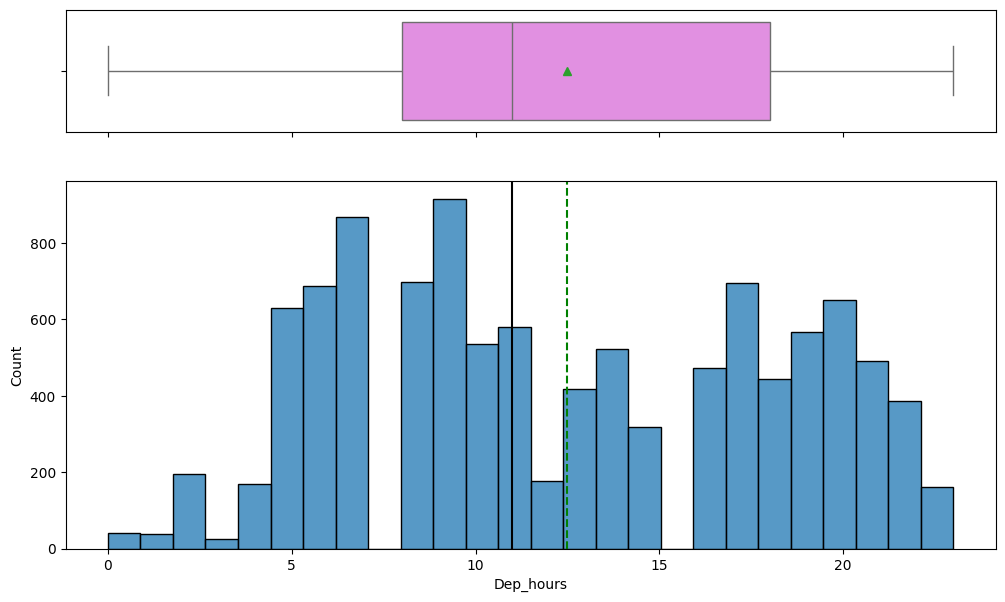

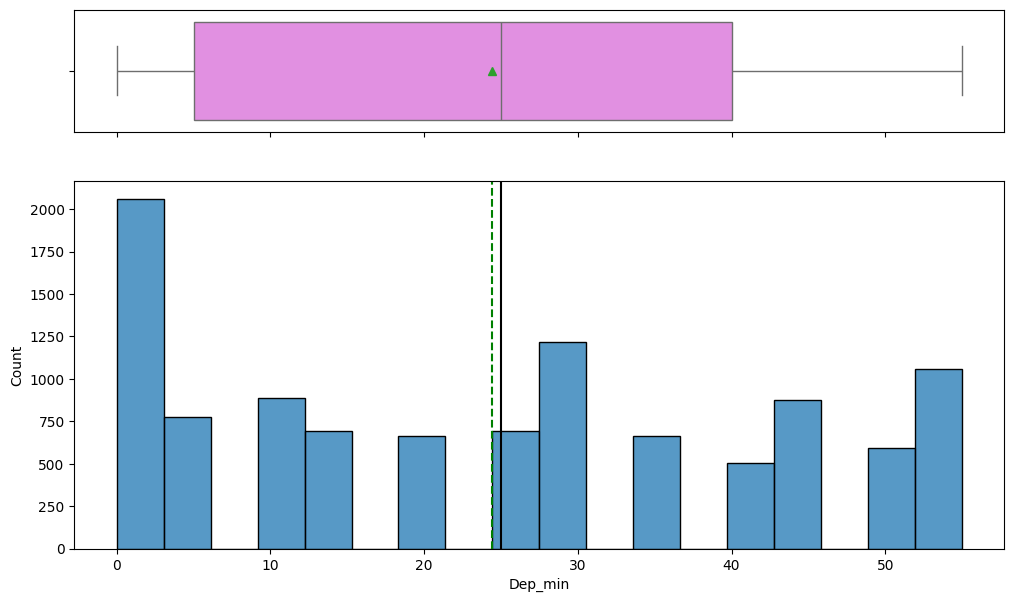

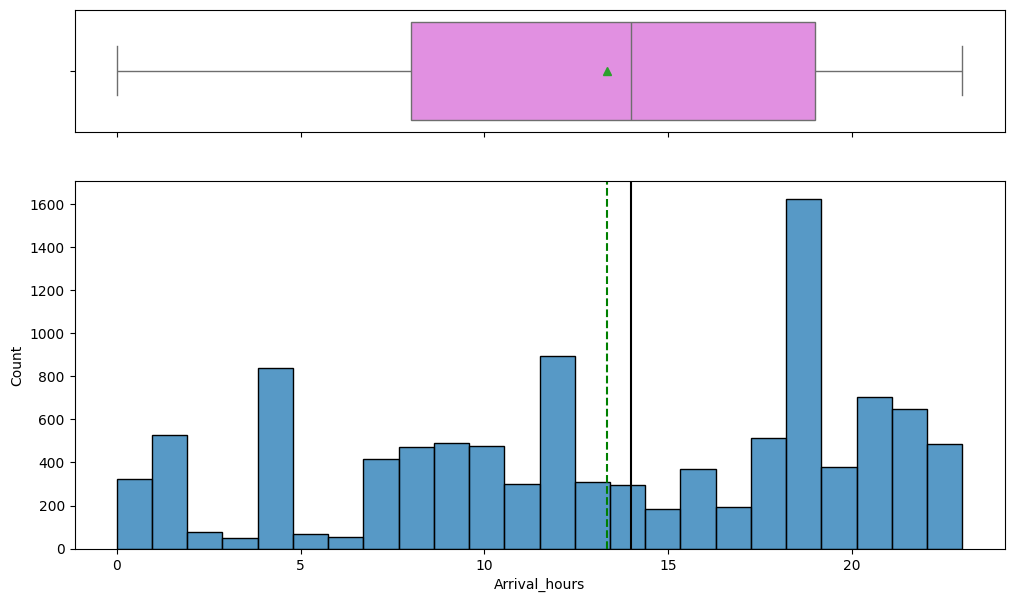

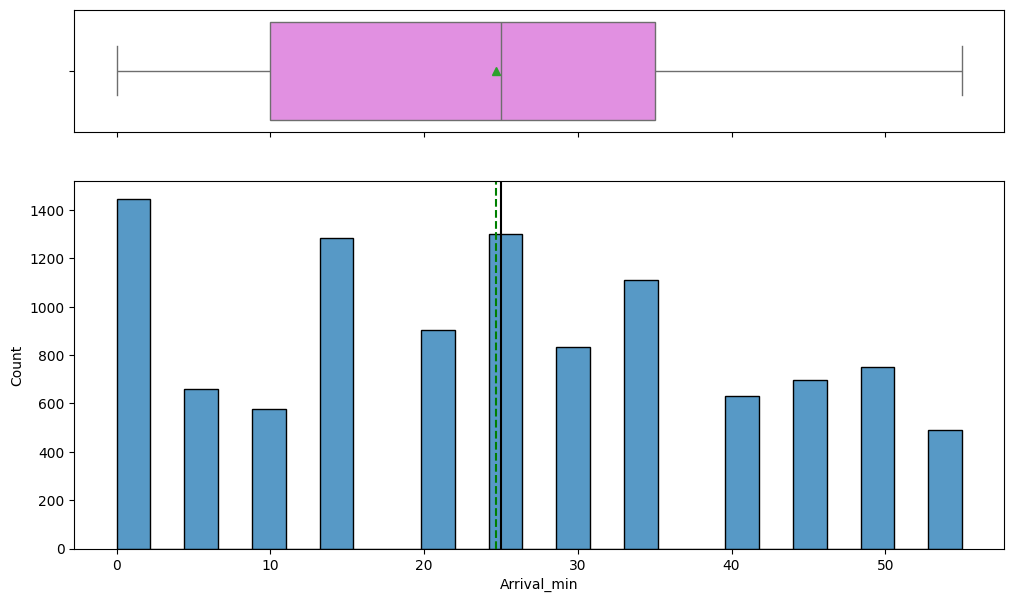

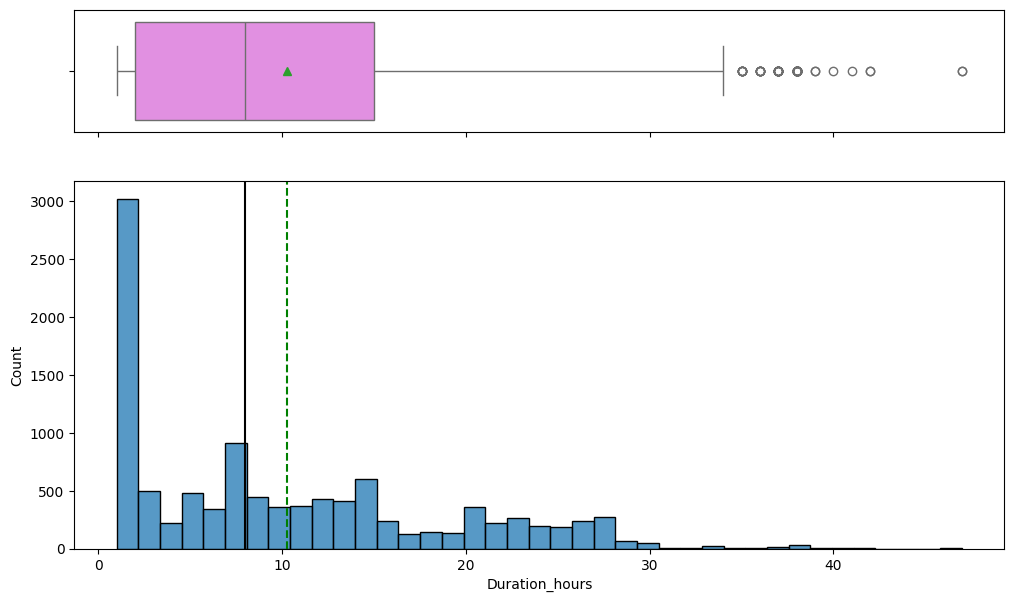

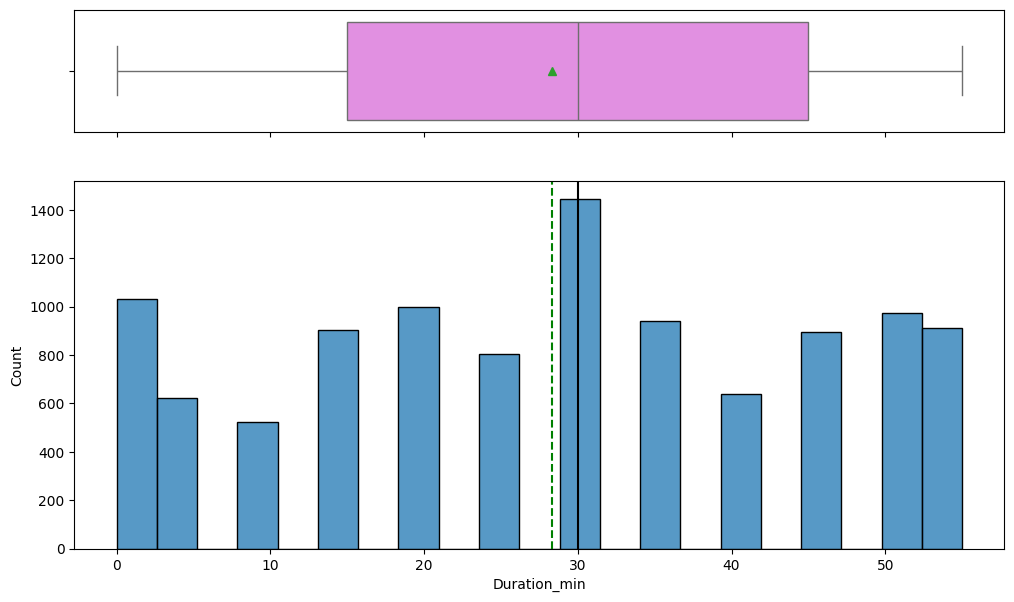

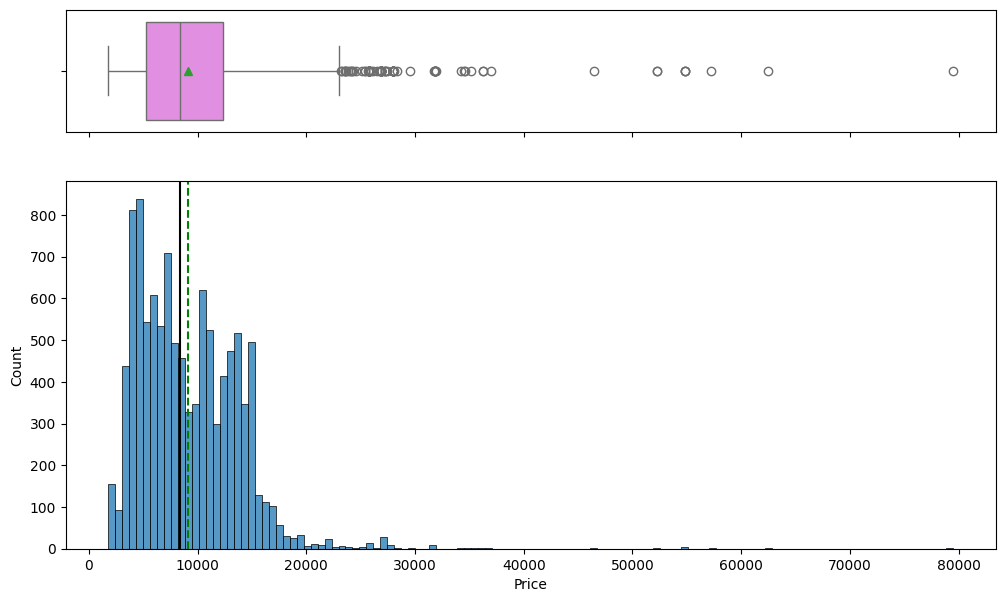

In [21]:
for feature in num_df.columns:
    histogram_boxplot(
        num_df, feature, figsize=(12, 7), kde=False, bins=None
    ) 

Observation on Univariate Analysis

We can observe outliers in Price, Duration hours and Total Stops but these seem to be very valid values.

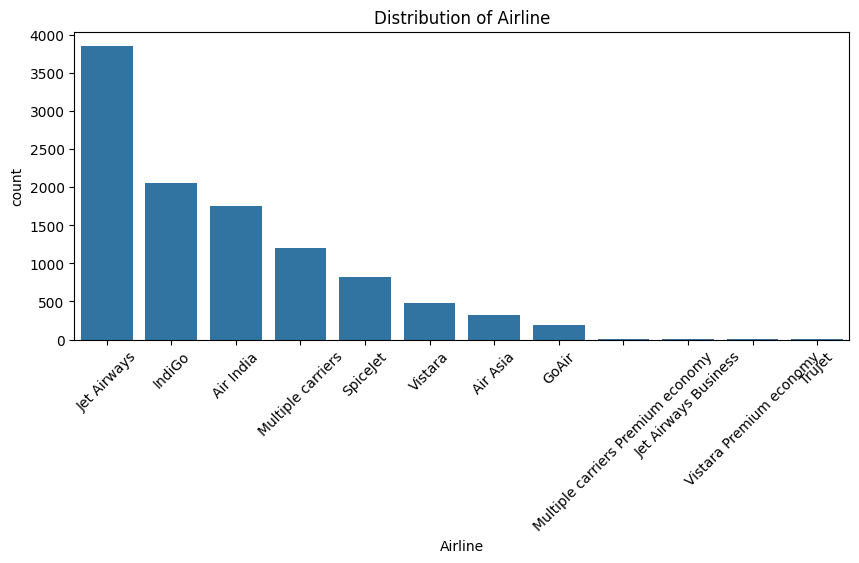

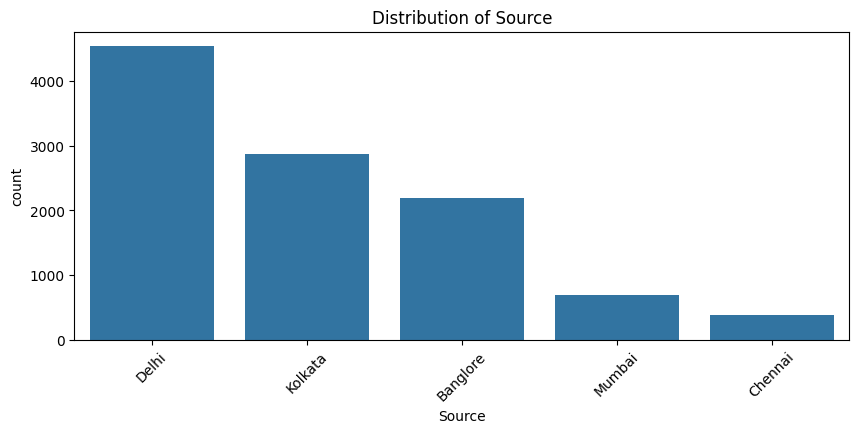

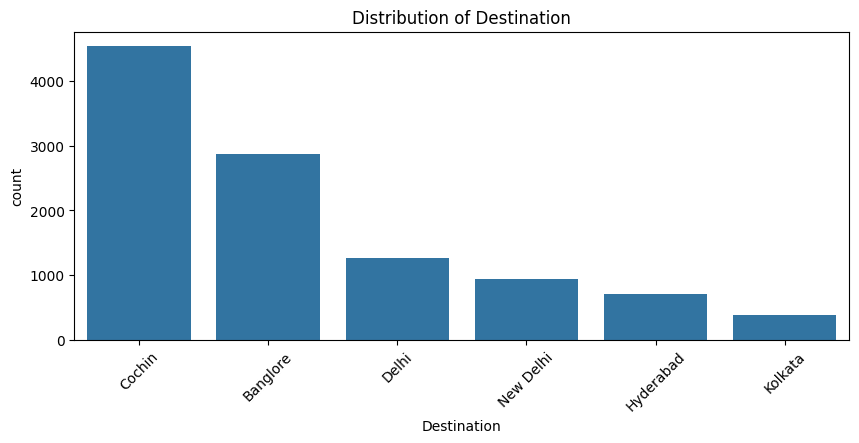

In [22]:
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df1, x=feature, order=df1[feature].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {feature}')
    plt.show()

1. Jet Airways has the highest count by a significant margin, indicating that it is the most frequent airline in the dataset.
2. Delhi has the highest count indicating that it is the most frequent source in the dataset.
3. Cochin has the highest count indicating that it is the most frequent destination in the dataset. 

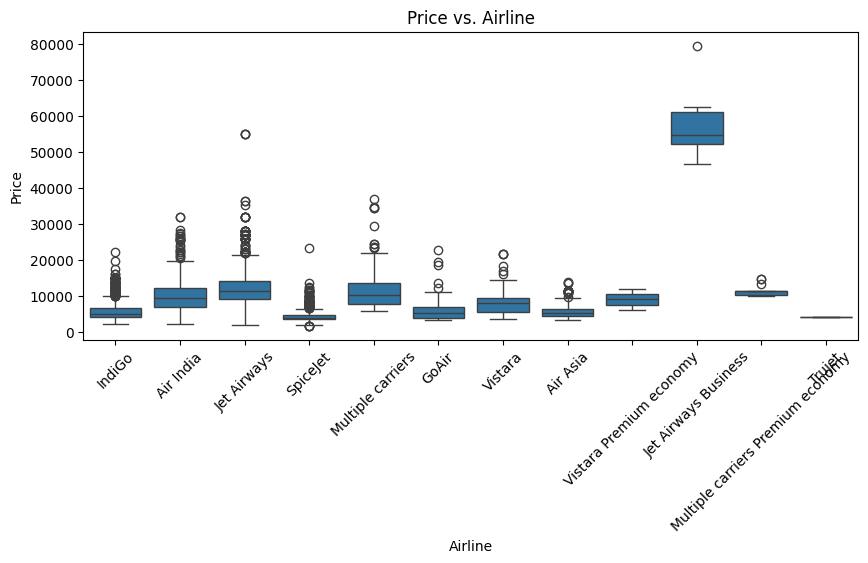

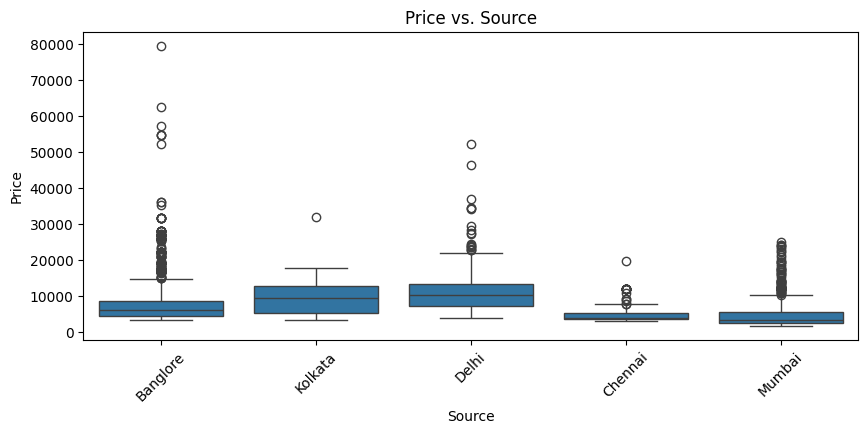

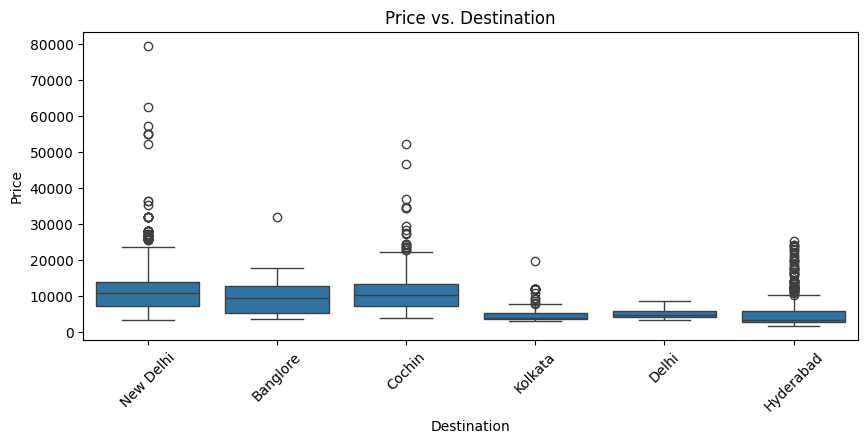

In [23]:
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df1, x=feature, y='Price')
    plt.xticks(rotation=45)
    plt.title(f'Price vs. {feature}')
    plt.show()

Observations:
    AIRLINES
1. IndiGo and Air Asia: Have lower median prices with a relatively small spread, indicating more consistent pricing.
2. Air India and Jet Airways: Show higher median prices and a broader spread, indicating more variability in pricing.
3. Multiple carriers, GoAir, Vistara: Have similar price distributions with moderate spreads.
4. Jet Airways Business and Vistara Premium Economy: Show significantly higher prices, with Jet Airways Business having the highest median price among all categories.
5. Multiple carriers Premium Economy: Although represented, has a small range and lower median price compared to Jet Airways Business.
6. Trujet: Shows a very low and consistent price range, with minimal variability.

SOURCES
1. Bangalore, Delhi, and Mumbai: Have similar patterns with a wide range of prices and several high-price outliers, indicating variability in flight costs from these cities.
2. Kolkata and Chennai: Show more consistent pricing, with Chennai having the most consistent and lower-priced flights.

DESTINATIONS
1. New Delhi, Bangalore, and Cochin: Show more variability in flight prices, with higher medians and several expensive outliers.
2. Kolkata and Delhi: Have the lowest and most consistent flight prices, indicating less variability and fewer expensive outliers.
3. Hyderabad: Falls somewhere in between, with moderate pricing and a few high outliers, suggesting occasional variability.

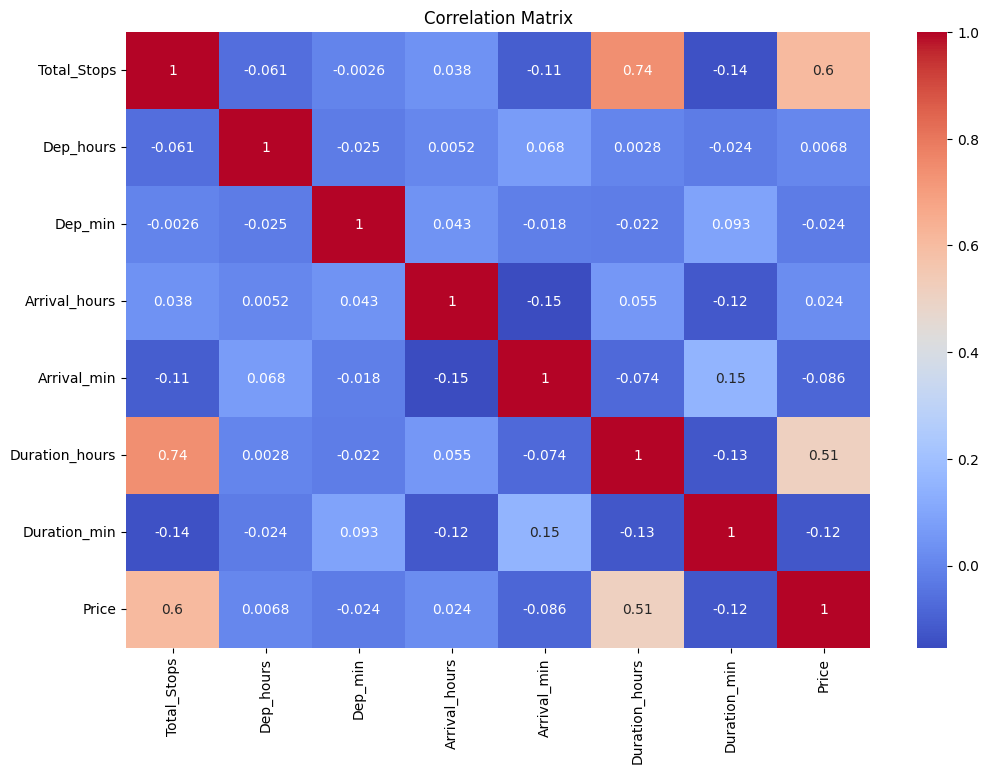

In [24]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Observations:

1. Total_Stops and Duration_hours:
Strong positive correlation (0.74).
Indicates that flights with more stops tend to have longer durations.

2. Total_Stops and Price:
Positive correlation (0.6).
Suggests that flights with more stops tend to be more expensive.

3. Duration_hours and Price:
Moderate positive correlation (0.51).
Suggests that flights with longer durations are more expensive.

4. Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_min:
These variables have weak correlations with each other and with the other variables, as indicated by the values close to 0.This suggests that departure and arrival times (in hours and minutes) have little linear relationship with the price or duration.

5. Arrival_min and Arrival_hours:
Negative correlation (-0.15), indicating a slight inverse relationship between arrival minutes and arrival hours.

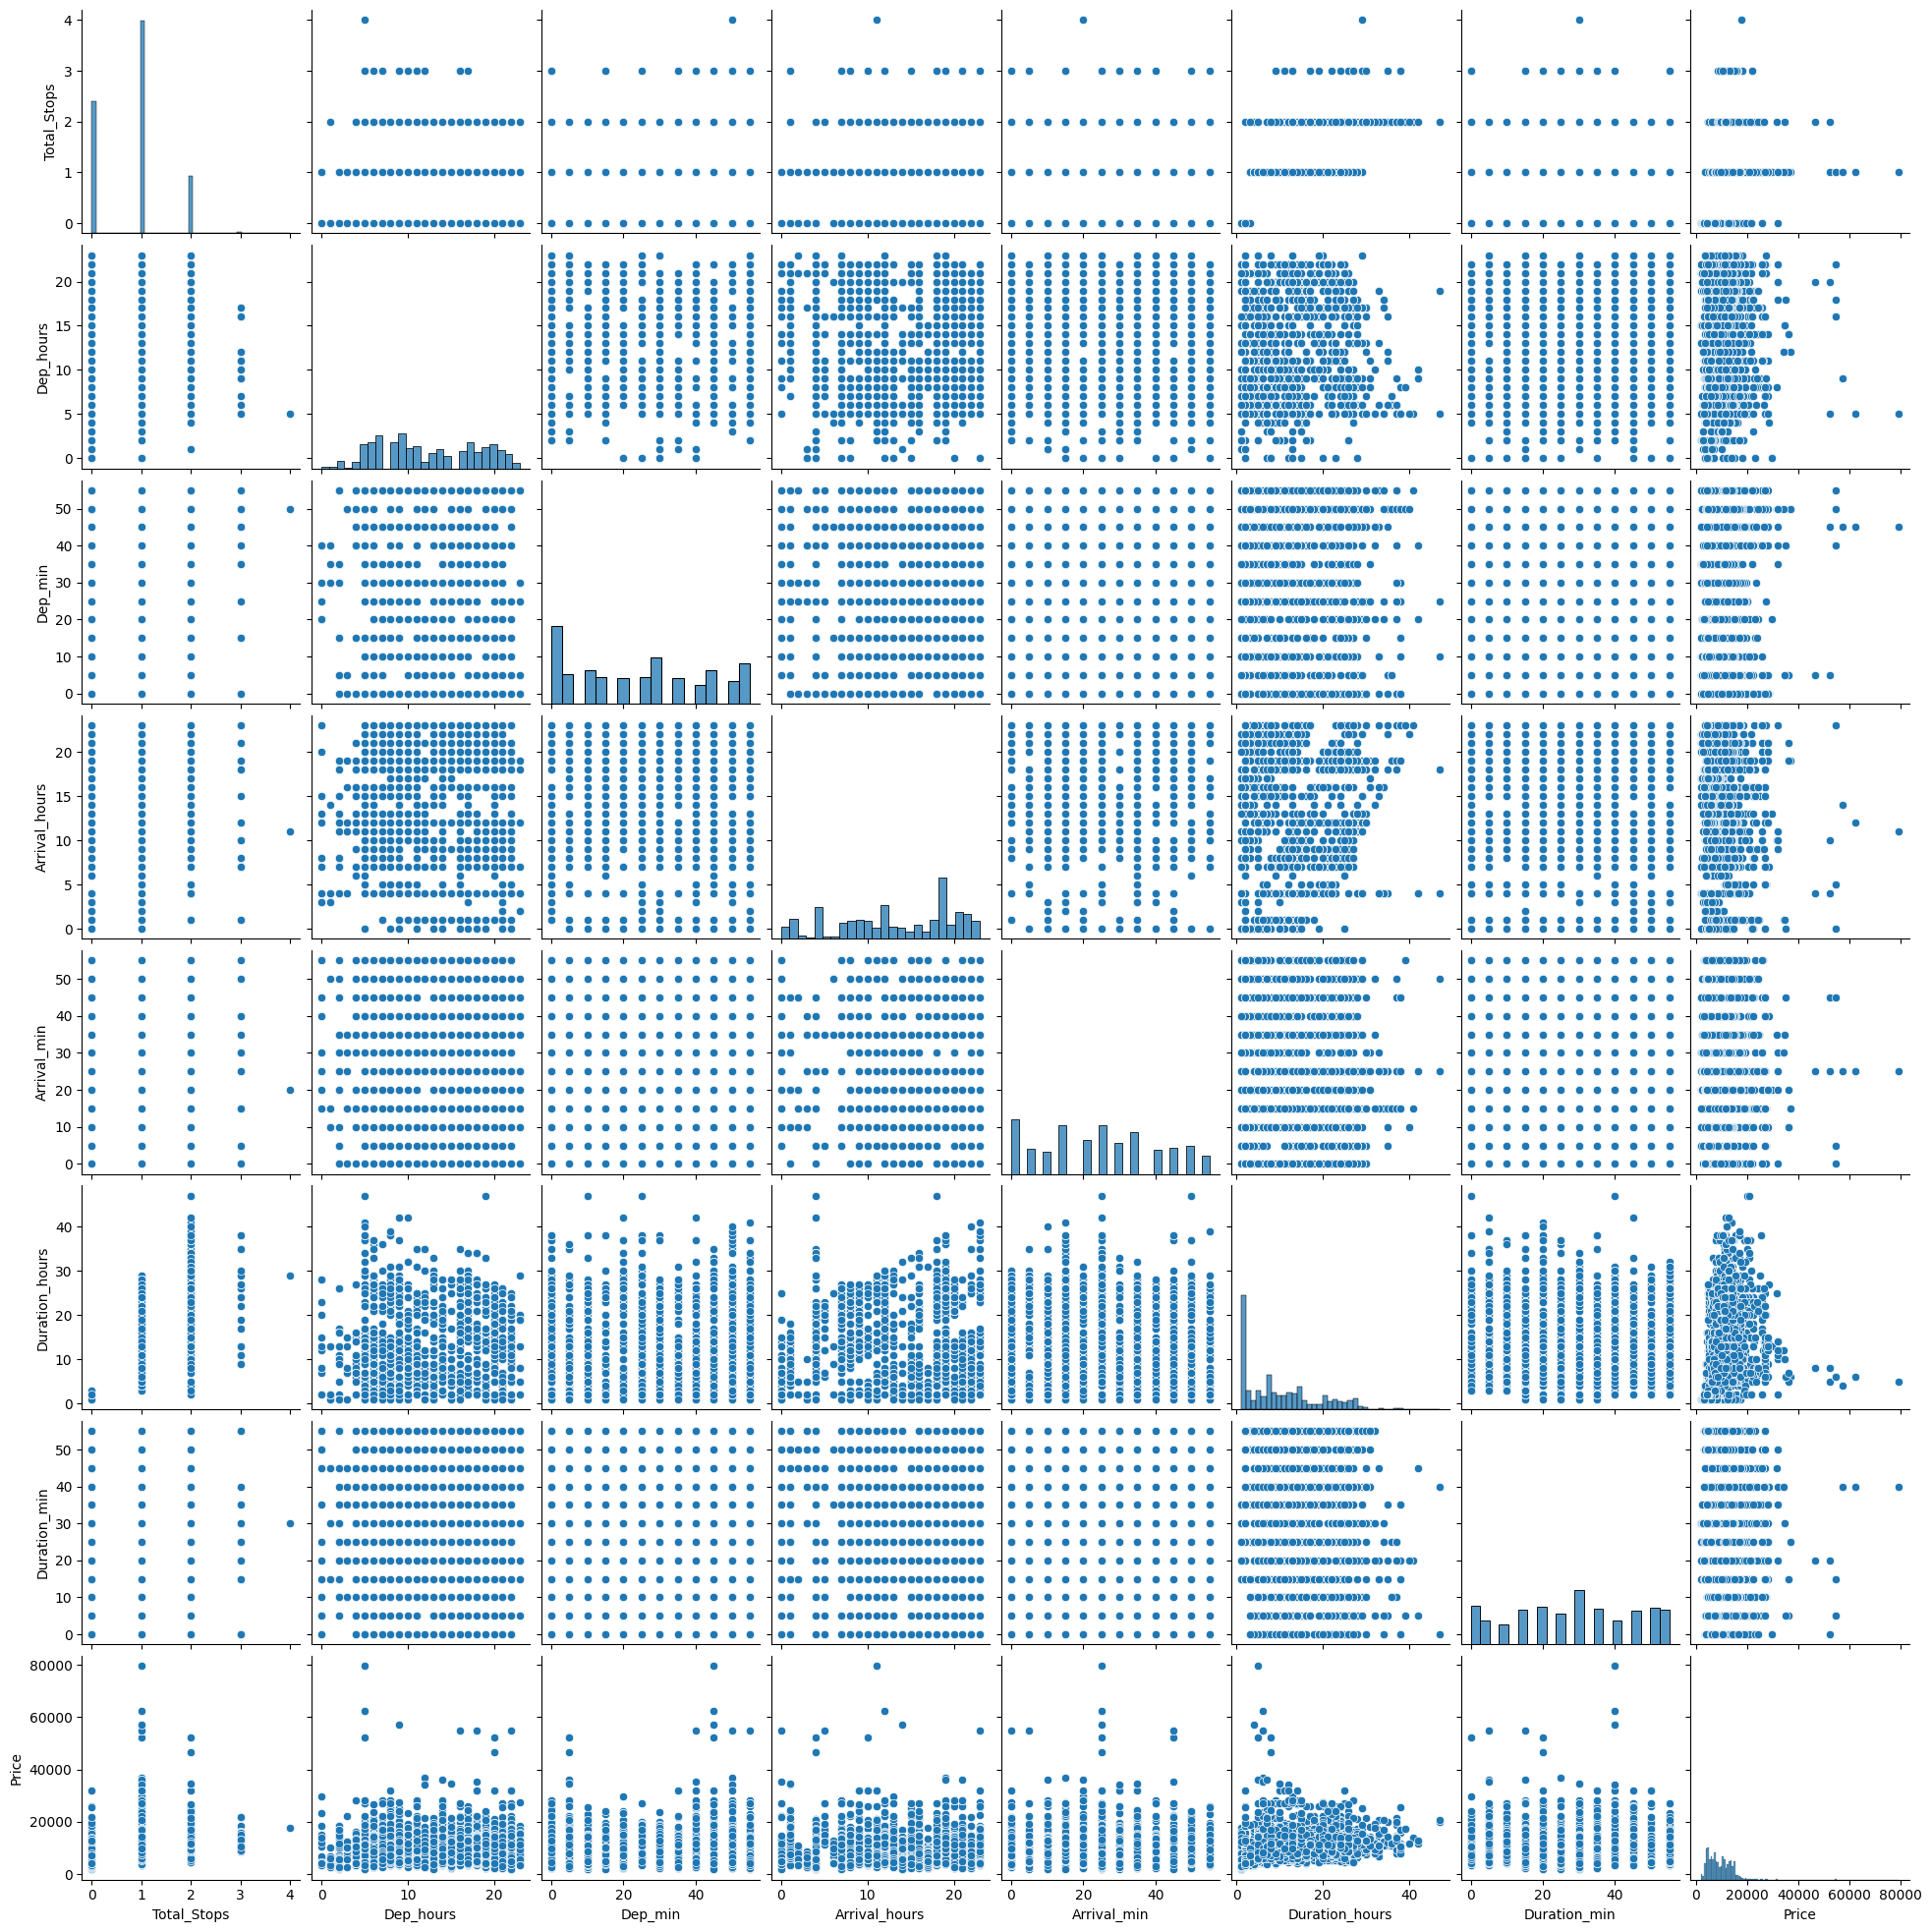

In [25]:
sns.pairplot(data=num_df)
plt.show()

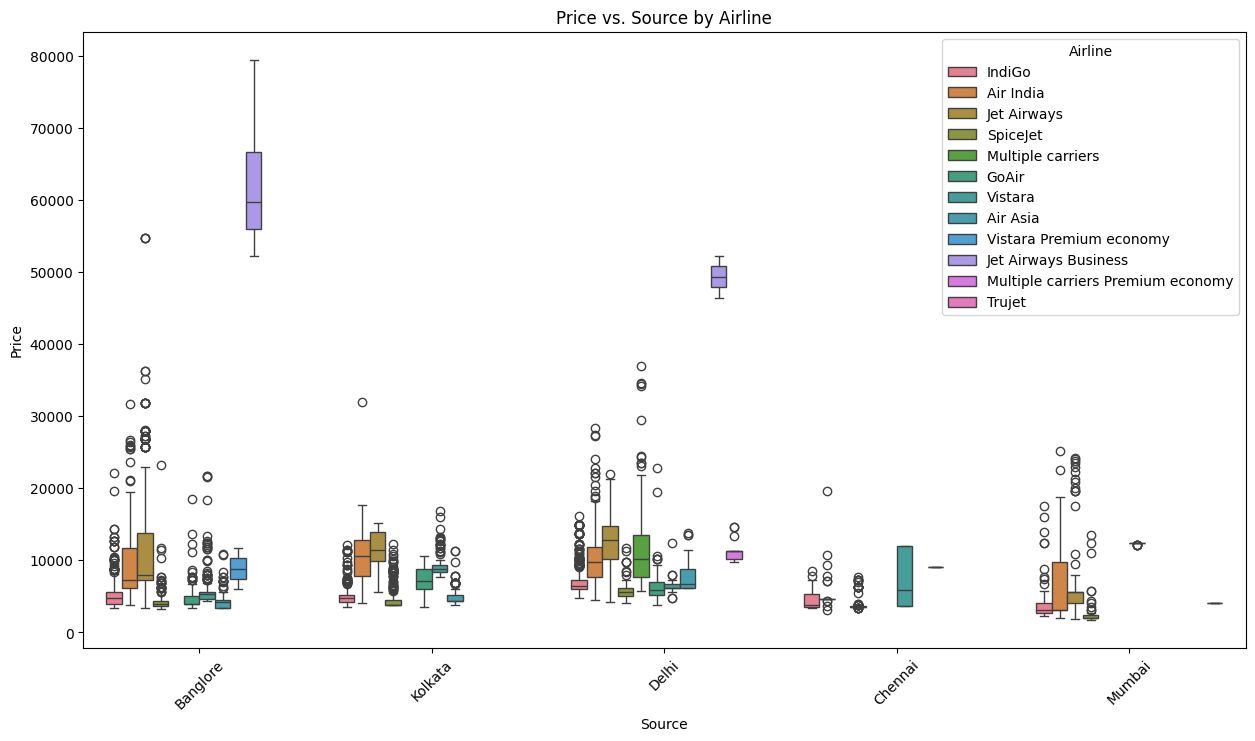

In [26]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Source', y='Price', hue='Airline')
plt.title('Price vs. Source by Airline')
plt.xticks(rotation=45)
plt.show()

### Feature Engineering

We have to convert categorical features into numerical features.
Why? Machine learning can be done with numbers, only numbers. So basically if you can turn a data into numbers, you can apply Machine Learning on it. Otherwise, you can't.
How? There are several ways of doing this. Get dummies, label encoder, or list comprehension. I am going to use Get Dummies on this notebook.

In [22]:
df5=df1.copy()
status = pd.get_dummies(df5[['Airline','Source','Destination']], drop_first = True)
status = status.astype(int)

In [23]:
df5 = pd.concat([df5, status], axis = 1)

In [24]:
df5.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
# We can drop these as we have created dummies for this.

In [25]:
# Before splitting the data into train and test, let's also drop Year, Arrival_time, Departure Time, Duration Time and Datee, Date and Month. We are Date and Month because they are string
df6=df5.copy()
df6.drop(['Date','Month','Year','Arrival_time','Departure_time','Duration_time','Datee'],axis=1,inplace=True)

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df6, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
num_vars = ['Total_Stops','Price','Dep_hours','Dep_min','Arrival_hours','Arrival_min','Duration_hours','Duration_min']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,Total_Stops,Price,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
3857,0.25,0.252159,0.565217,1.000000,0.913043,0.000000,0.130435,0.090909,0,0,...,0,0,1,0,0,1,0,0,0,0
10228,0.25,0.153755,0.217391,0.818182,0.434783,0.454545,0.065217,0.727273,0,0,...,0,0,0,0,0,0,0,0,0,1
4879,0.25,0.194963,0.565217,0.000000,0.913043,0.000000,0.152174,0.000000,0,0,...,0,0,1,0,0,1,0,0,0,0
1535,0.00,0.034845,0.869565,0.545455,1.000000,0.363636,0.021739,0.909091,0,0,...,0,0,0,0,0,0,0,0,0,1
7128,0.00,0.082119,0.260870,0.000000,0.391304,0.181818,0.043478,0.181818,0,0,...,0,0,1,0,0,1,0,0,0,0


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7478 entries, 3857 to 5640
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                7478 non-null   float64
 1   Price                                      7478 non-null   float64
 2   Dep_hours                                  7478 non-null   float64
 3   Dep_min                                    7478 non-null   float64
 4   Arrival_hours                              7478 non-null   float64
 5   Arrival_min                                7478 non-null   float64
 6   Duration_hours                             7478 non-null   float64
 7   Duration_min                               7478 non-null   float64
 8   Airline_Air India                          7478 non-null   int32  
 9   Airline_GoAir                              7478 non-null   int32  
 10  Airline_IndiGo            

In [33]:
df_train.describe()

,Total_Stops,Price,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,...,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000
mean,0.207408,0.121414,0.543775,0.446364,0.583689,0.446485,0.202074,0.516825,0.161541,0.019256,...,0.000267,0.034902,0.428724,0.266381,0.065526,0.428724,0.115673,0.065526,0.034902,0.088794
std,0.168607,0.076273,0.248683,0.340927,0.296977,0.299191,0.184354,0.309358,0.368053,0.137434,...,0.016353,0.183545,0.494927,0.442096,0.247467,0.494927,0.319853,0.247467,0.183545,0.284465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058054,0.347826,0.090909,0.347826,0.181818,0.021739,0.272727,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.109003,0.478261,0.454545,0.608696,0.454545,0.152174,0.545455,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.174952,0.782609,0.727273,0.826087,0.636364,0.304348,0.818182,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


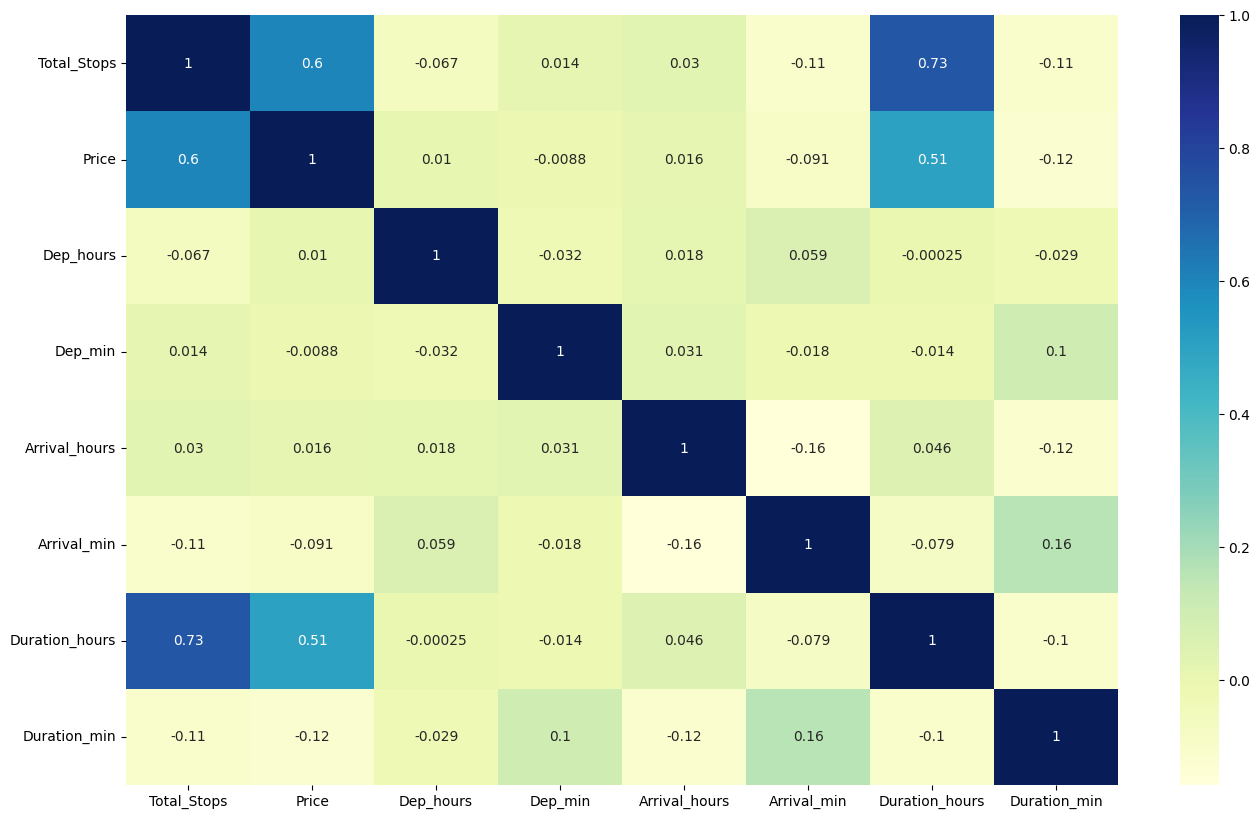

In [34]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [35]:
y_train = df_train.pop('Price')
X_train = df_train

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [39]:
lm = sm.OLS(y_train,X_train).fit()

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:43:00   Log-Likelihood:                 11954.
No. Observations:                7478   AIC:                        -2.386e+04
Df Residuals:                    7454   BIC:                        -2.369e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [41]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
#  It is a measure for multicollinearity. If VIF is greater than 5, then the explanatory variable is highly 
# collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [42]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\Himu\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
27,Destination_New Delhi,inf
23,Destination_Cochin,inf
21,Source_Kolkata,inf
20,Source_Delhi,inf
19,Source_Chennai,inf
24,Destination_Delhi,inf
25,Destination_Hyderabad,inf
26,Destination_Kolkata,inf
22,Source_Mumbai,inf
11,Airline_Jet Airways,9.45


In [43]:
X_train1=X_train.copy()

In [44]:
X_train1.drop(['Destination_New Delhi','Destination_Cochin','Destination_Hyderabad','Destination_Delhi','Destination_Kolkata','Source_Mumbai','Source_Chennai','Source_Delhi','Source_Kolkata','Source_Mumbai'],axis=1,inplace=True)

In [45]:
X_train1

,const,Total_Stops,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
3857,1.0,0.25,0.565217,1.000000,0.913043,0.000000,0.130435,0.090909,0,0,0,0,0,1,0,0,0,0,0
10228,1.0,0.25,0.217391,0.818182,0.434783,0.454545,0.065217,0.727273,0,0,0,1,0,0,0,0,0,0,0
4879,1.0,0.25,0.565217,0.000000,0.913043,0.000000,0.152174,0.000000,0,0,0,0,0,1,0,0,0,0,0
1535,1.0,0.00,0.869565,0.545455,1.000000,0.363636,0.021739,0.909091,0,0,0,0,0,0,0,1,0,0,0
7128,1.0,0.00,0.260870,0.000000,0.391304,0.181818,0.043478,0.181818,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,0.00,0.260870,0.000000,0.347826,0.818182,0.021739,0.818182,0,0,0,1,0,0,0,0,0,0,0
79,1.0,0.00,0.347826,0.363636,0.434783,0.636364,0.021739,0.272727,0,0,0,0,0,0,0,1,0,0,0
8039,1.0,0.25,0.782609,0.636364,0.043478,0.545455,0.108696,1.000000,0,0,1,0,0,0,0,0,0,0,0
6936,1.0,0.00,0.173913,0.000000,0.260870,0.909091,0.021739,0.909091,0,0,1,0,0,0,0,0,0,0,0


In [46]:
lm1 = LinearRegression()
lm1.fit(X_train1, y_train)

LinearRegression()

In [47]:
lm1 = sm.OLS(y_train,X_train1).fit() 

In [48]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     498.1
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:24:50   Log-Likelihood:                 11585.
No. Observations:                7478   AIC:                        -2.313e+04
Df Residuals:                    7459   BIC:                        -2.300e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [49]:
y_train_price = lm1.predict(X_train1)

In [50]:
y_train_price

3857     0.148293
10228    0.158390
4879     0.146259
1535     0.033949
7128     0.073707
           ...   
350      0.107669
79       0.032278
8039     0.097346
6936     0.040305
5640     0.164311
Length: 7478, dtype: float64

In [51]:
res = (y_train_price - y_train)

C:\Users\Himu\AppData\Local\Temp\ipykernel_13504\558032551.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

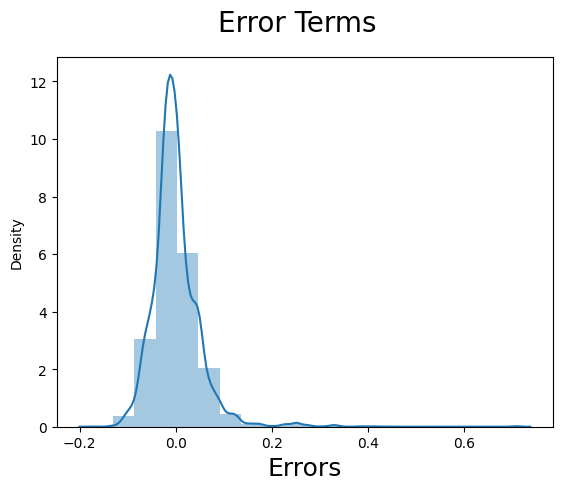

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

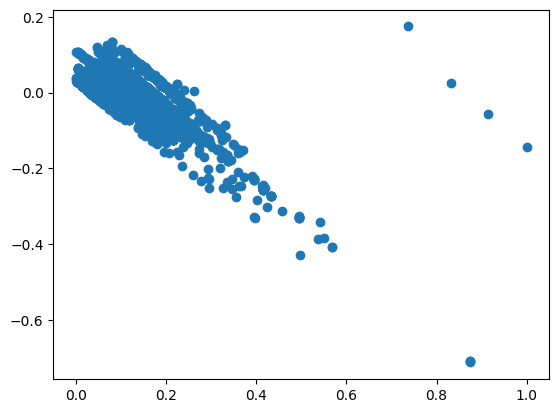

In [53]:
plt.scatter(y_train,res)
plt.show()

In [54]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [55]:
y_test = df_test.pop('Price')
X_test = df_test


In [56]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [57]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_f = X_test[X_train1.columns]

In [58]:
# Making predictions
y_pred = lm1.predict(X_test_f)

Text(0, 0.5, 'y_pred')

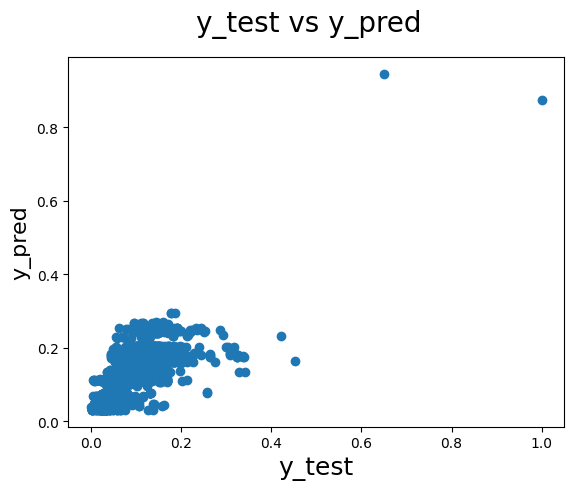

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Equation of our best fitted line is
price=